# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
        <font color='green'> ANS: The theoretical CDF and the ECDF of the data suggest    that the temperatures are, indeed, Normally distributed. This also suggests that in the last 120 years or so, there have not been major evolutions,climate changes, or other factors that have significantly affected the normal human body temperatures. However, because we only have 130 samples, in order to prove the population data is normally distributed, we need a larger size.</font>
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    <font color='green'> ANS: the sample size has 130 entries, which is larger than 30, so is considered large.However, because we only have 130 samples, in order to prove the population data is normally distributed, we need a larger size. The observation is independent because each entry is a single individual with his or her gender, and heart rate. But we wil prefer using t-statistics because the population variance was not known.</font>
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
        <font color='green'> ANS: by trying bootstrap with the hyothesis test population mean is 0, p-value equals to zero, so the null hyothesis rejected. We should accept the alternate hypothesis that the true population mean is not 98.6 degrees F.</font>
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
        <font color='green'> ANS: I use one-sample test because temperature is the only sample we are testing.</font>
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
        <font color='green'> ANS: I use t statistics because t-statistics is done when the population standard deviation is unkown. </font>
    <li> Now try using the other test. How is the result be different? Why?
        <font color='green'> ANS: The result is differet because bootstrap approach relies on random sampling approach, we sampled 10,000 in size, so the p-value gets much closer to zero. </font>
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use?
        <font color='green'> ANS: if we use sample size 10, the p_value is 0.13, which means we should accept the null hypothesis. Hence, we should actually increase the sample size so the hypothesis result is more accurate. </font>
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
        <font color='green'> ANS: T-stattistics test is used when the population variation or standard deviation is unkown.Also, when the sample size is 30 or less. Z-statistics test is just the opposite. </font>
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
       <font color='green'> if a temperature is outside of a range of [98.12, 98.37], it will be considered abnormal.</font>
        <font color='green'> The margin of error is 0.1256.Hence, we are 95% confident that samples will be within the range of +/- 0.1256 from the mean.</font>
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
        <font color='green'> The test I use is the frequentist statistics approach - t-statitistics test. The t-test is used to compare the means of two samples. In this case, we have two sample, unpaired, which are independent with each other with equal values.</font>
    <li> Write a story with your conclusion in the context of the original problem.
        <font color='green'> Given p-value equals to 0.022 which is less than the significance level of 0.05,, we should reject the null hypothesis because it is in the favor of the alternate hypothesis. Hence, there is a significant difference between males and femals in normal temperature.</font>
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

1. Is the distribution of body temperatures normal?

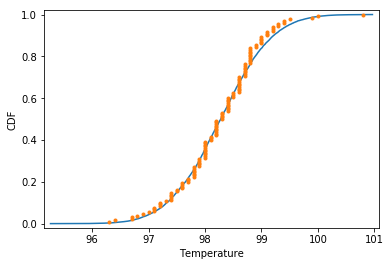

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('data/human_body_temperature.csv')
#compute ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y

sigma = np.std(df['temperature'])  
mu = np.mean(df['temperature'])
samples=np.random.normal(mu, sigma, size=10000)

x_theor, y_theor = ecdf(samples)
x, y=ecdf(df['temperature'])

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')

plt.show()



3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test
 hyphothesis #1: the true population mean is 98.6.
  Write a function to generate many bootstrap replicates from the data set

In [12]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


bs_replicates=draw_bs_reps(df.temperature, np.mean, size=10000)

p=np.sum(bs_replicates >= 98.6)/10000
p


0.0

Becuse the p is zero, so the null hypothesis is rejected. As a result, the true population mean is not 98.6.

5 Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [13]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
data= df.temperature
n = len(data)
mu = data.mean()
sigma =data.std()
t=(98.6-mu)/(sigma/np.sqrt(n))
t


5.454823292364079

In [14]:
#pval_z=2*(1-st.norm.cdf(z))
pval_t=st.norm.sf(abs(t)) * 2 
pval_t

4.90215701411338e-08

In [15]:
t_sample=np.random.choice(df.temperature, size=10)
t=scipy.stats.ttest_1samp(t_sample,98.6)
t


Ttest_1sampResult(statistic=-1.7936339323123727, pvalue=0.10645754000662676)

In [16]:
var = np.var(df.temperature)

se = np.sqrt(var/len(df)) # standard error
moe = se * 1.96 # 1.96 is the 95% z-score
moe # margin of error  

0.125550964802579

Now try using the other test. How is the result be different? Why?

In [26]:
#5.At what temperature should we consider someone's temperature to be "abnormal"? 

conf_int = np.percentile(bs_replicates, (2.5, 97.5))
print('95% confidence interval =', conf_int, 'temperature')

low_conf_int = mu - 1.96*se 
high_conf_int = mu + 1.96*se 
print('Confidence Intervals: ', low_conf_int, high_conf_int)

95% confidence interval = [98.12461538 98.37538462] temperature
Confidence Intervals:  98.12367980442819 98.37478173403336



and use the two sample t test formula to get t statistic
and then get p value from that

https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm

In [18]:
#create two data frames
males = df[df.gender =='M']['temperature']
females = df[df.gender=='F']['temperature']
mu_males = males.mean()
mu_females = females.mean()
var_males = males.var()
var_females = females.var()

In [19]:
t = (mu_males - mu_females)/np.sqrt(var_males/len(males)+var_females/len(females))
pval_t=st.norm.sf(abs(t)) * 2 
pval_t

0.02228736076067726